In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import argparse

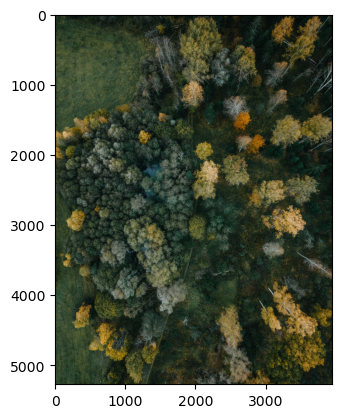

In [2]:
im = Image.open('unsplash.jpg')
# im.show()

pic = np.array(im)
# print(pic)

plt.imshow(pic)

plt.show()

In [3]:
print(pic.shape)
# (height, width, channels)
print(pic.max())
# typically 255 for most images
print(type(pic.shape[0]))

(5272, 3948, 3)
255
<class 'int'>


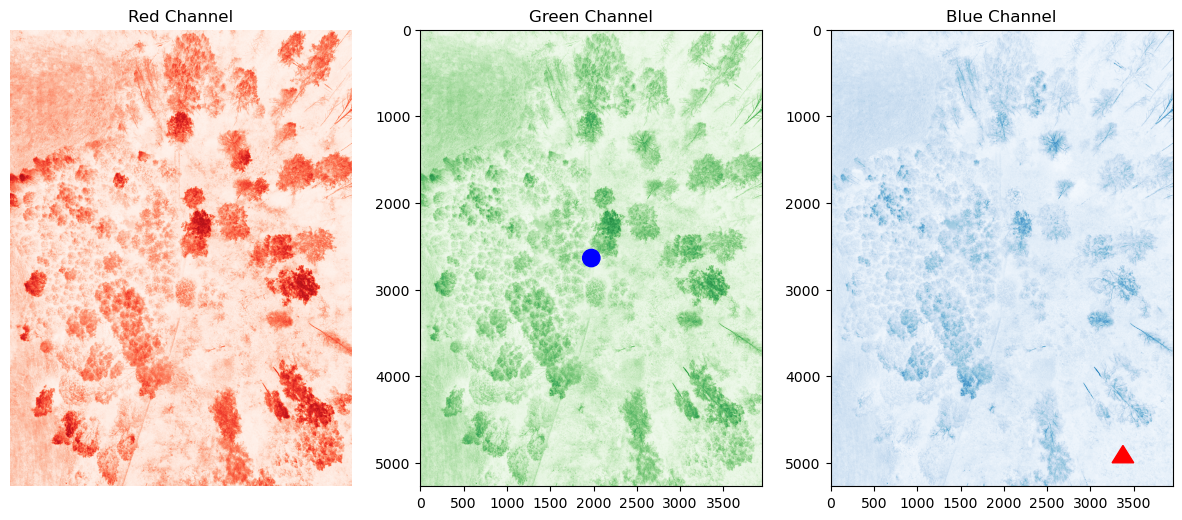

In [4]:
rpic = pic[:,:,0]
gpic = pic[:,:,1]
bpic = pic[:,:,2]

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(rpic, cmap='Reds')
axs[1].imshow(gpic, cmap='Greens')
axs[2].imshow(bpic, cmap='Blues')

axs[0].axis('off')
axs[1].axis('on')
axs[2].axis('on')

axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')


# plotting red triangle in bottom right corner
coords = np.array([[3250, 5000], [3500, 5000], [3375, 4800]])
triangle = plt.Polygon(coords, color='r')
axs[2].add_patch(triangle)
# axs[2].plot(x, z, 'r')

# plotting blue circle in center of image
circle = plt.Circle((pic.shape[1] / 2, pic.shape[0] / 2), 100, color='b')
axs[1].add_patch(circle)

# try without patches
# go into the numpy array to model the values directly

plt.show()

In [5]:
print(axs)
print(axs[0])

[<Axes: title={'center': 'Red Channel'}>
 <Axes: title={'center': 'Green Channel'}>
 <Axes: title={'center': 'Blue Channel'}>]
Axes(0.125,0.266712;0.227941x0.456575)


[2636. 1974.]


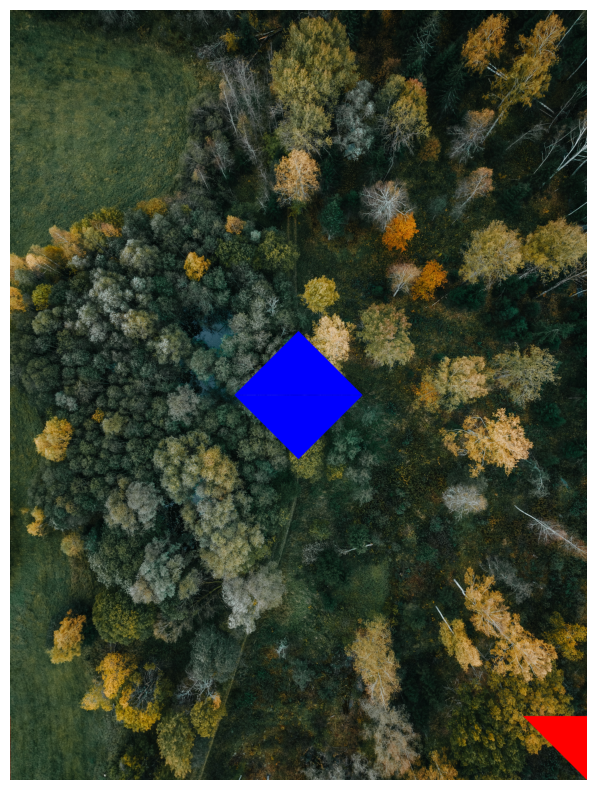

In [15]:
# directly changing numpy array
fig, ax = plt.subplots(1, 1, figsize=(15,10))

pic_shapes = pic.copy()

h = math.floor(int(pic_shapes.shape[0])/12)

# red triangle

for i in range(h): # heights
    for j in range(i):
        pic_shapes[-i, -j, :] = [255,0,0]

# blue circle

center = np.array([pic_shapes.shape[0], pic_shapes.shape[1]])
center = center/2
center_height = int(center[0])
center_width = int(center[1])
print(center)

for i in range(h): # top half
    pic_shapes[center_height - h + i, center_width - i:center_width + i, :] = [0,0,255]


for i in range(h,0,-1): # bottom half
    pic_shapes[center_height + i, center_width - (h - i):center_width + (h - i), :] = [0,0,255]

# plotting

ax.imshow(pic_shapes)
ax.axis('off')
plt.show()

In [16]:
print(range(int(center[0]), int(center[0]) + 1000))

range(2636, 3636)


In [8]:
x = np.array([[[1,2,3], [4,5,6], [7,8,9]],
            [[10,11,12], [13,14,15],[16,17,18]],
             [[19,20,21], [22,23,23], [25,26,27]],
             [[28,29,30], [31,32,33], [34,35,36]]])
y = 5

# print(x)
# print()
# print()
# print(f'x[:,:,0] is \n {x[:,:,0]}')
# print(f'x[:,1,:] is \n {x[:,1,:]}')
# print(f'x[:,:,2] is \n {x[:,:,2]}')
# print(f'x[-2:,1,:] is \n {x[-2:,1,:]}')
# x.shape
# x.shape[1]
# print('shapes above')

# for i in x[-2:,:,:]:
#     print('this is', i)
#     print('i[0] is', i[0])

for i in x[-2:,:,:]:
    for j in range(2):
        # i[j, [1,2]] = 0
        print('this is i[',j,']', i)

this is i[ 0 ] [[19 20 21]
 [22 23 23]
 [25 26 27]]
this is i[ 1 ] [[19 20 21]
 [22 23 23]
 [25 26 27]]
this is i[ 0 ] [[28 29 30]
 [31 32 33]
 [34 35 36]]
this is i[ 1 ] [[28 29 30]
 [31 32 33]
 [34 35 36]]


225 225 3


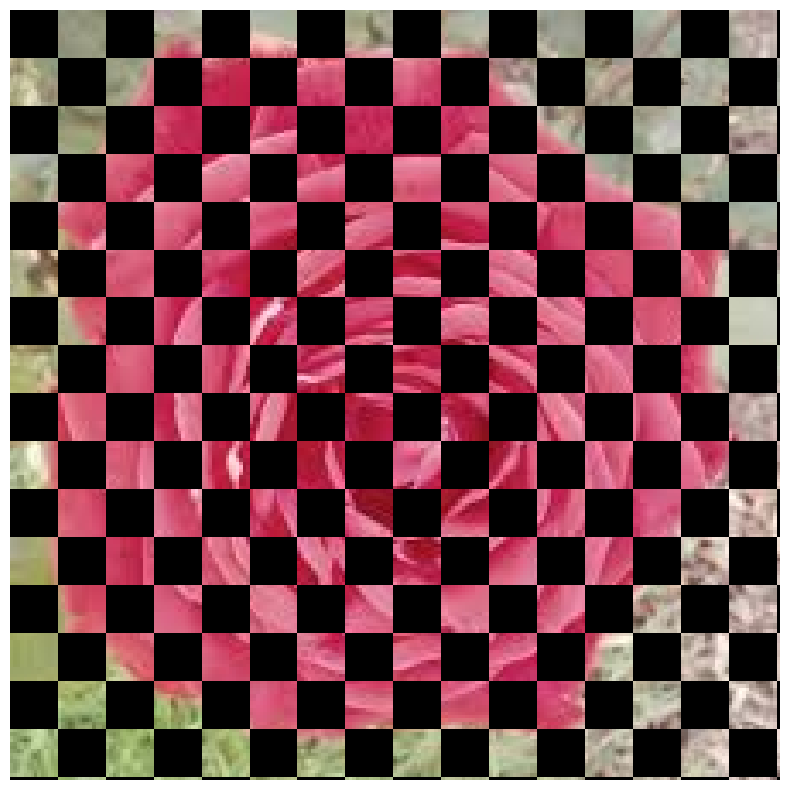

In [4]:
# parser = argparse.ArgumentParser(
#     description='Choose an image to over a checkerboard pattern over'
# )
# parser.add_argument('filename', type=argparse.FileType('r'))
# args = parser.parse_args("")
# print(args.filename)

flower = Image.open("flower.jpeg")
# flower = Image.open("unsplash.jpg")
flower_pic = np.array(flower)

n = 14 # square size
checker_pic = flower_pic.copy()
height, width, channel = checker_pic.shape
print(height, width, channel)


for i in range(width):
    for j in range(height):
        if ((i % (2 * n)) < n) and ((j % (2 * n)) < n):
            checker_pic[j,i,:] = [0,0,0]
        elif ((i % (2 * n)) >= n) and ((j % (2 * n)) >= n):
            checker_pic[j,i,:] = [0,0,0]

# plotting
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.imshow(checker_pic)
ax.axis('off')
plt.show()

In [84]:
parser = argparse.ArgumentParser(
    description='Choose an image to over a checkerboard pattern over'
)
parser.add_argument('filename', type=str, help='Path to the file')
args = parser.parse_args(['your_file.txt'])
args = parser.parse_args("")
print(args.filename)

usage: ipykernel_launcher.py [-h] filename
ipykernel_launcher.py: error: the following arguments are required: filename


SystemExit: 2